In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/tanlitung388/Python-DataScienceAmplify/master/HR_comma_sep.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
categorical = ['promotion_last_5years' ,'work_accident' ,'salary' , 'department', 'left']
for i in categorical :
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  category
 9   salary                 14999 non-null  category
dtypes: category(5), float64(2), int64(3)
memory usage: 660.1 KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
work_accident,14999.0,2.0,0.0,12830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left,14999.0,2.0,0.0,11428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,14999.0,2.0,0.0,14680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


promotion_last_5years describe
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


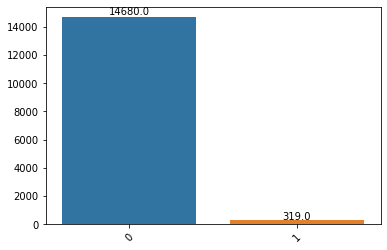

work_accident describe
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


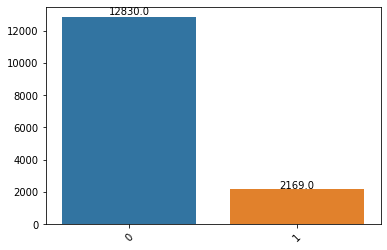

salary describe
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


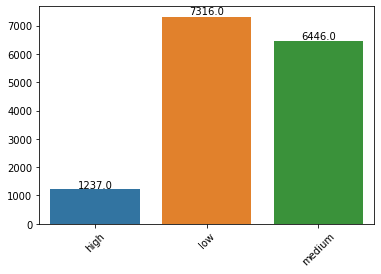

department describe
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


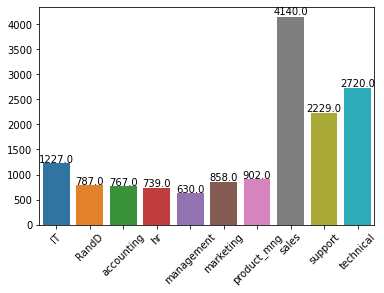

left describe
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


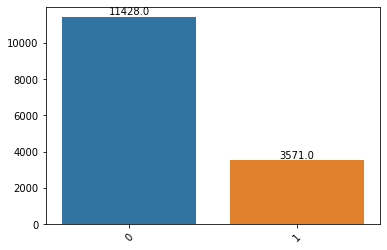

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

for i in categorical :
    df[i] = df[i].astype('category')
    print(str(i) + ' describe')
    print(' ')
    show_values(sns.barplot(df[i].value_counts().index ,df[i].value_counts().values))
    plt.xticks(rotation=45)

    plt.show()

employee choice regarding leaving gets affected by work_accident (reject H0)


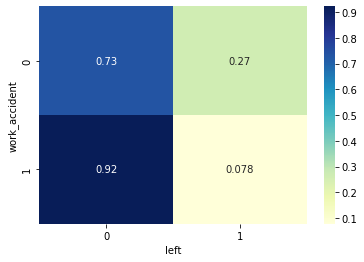

employee choice regarding leaving gets affected by promotion_last_5years (reject H0)


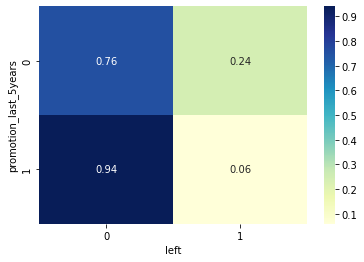

employee choice regarding leaving gets affected by department (reject H0)


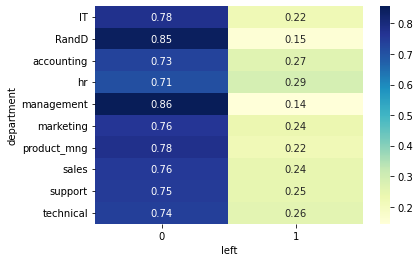

employee choice regarding leaving gets affected by salary (reject H0)


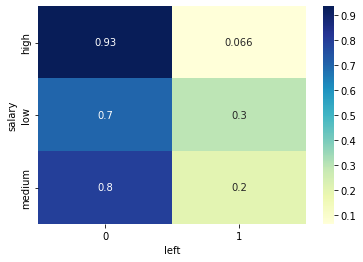

In [ ]:
from scipy.stats import chi2_contingency

for i in df.select_dtypes(['category']).drop(columns=['left']).columns:
    p =  (chi2_contingency(pd.crosstab(df[i], df['left']))[1])
    if p < .001 :
        print('employee choice regarding leaving gets affected by {} (reject H0)'.format(i))
    else :
        print('employee choice regarding leaving not affected by {} (fail to reject H0)'.format(i))

    contigency_pct = pd.crosstab(df[i], df['left'], normalize='index')
    sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
    plt.show()

In [ ]:
df['promo_code'] = df['promotion_last_5years'].cat.codes
df['wkacc_code'] = df['work_accident'].cat.codes
df['sal_code'] = df['salary'].cat.codes
df['dept_code'] = df['department'].cat.codes

print(df['promo_code'].value_counts())
print(df['wkacc_code'].value_counts())
print(df['sal_code'].value_counts())
print(df['dept_code'].value_counts())

0    14680
1      319
Name: promo_code, dtype: int64
0    12830
1     2169
Name: wkacc_code, dtype: int64
1    7316
2    6446
0    1237
Name: sal_code, dtype: int64
7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: dept_code, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','promo_code','wkacc_code','sal_code','dept_code']].to_numpy()
y = df['left'].to_numpy()
X_train , X_test , y_train , y_test = train_test_split(X , y )

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler(with_mean=False)
X_train[:,:5]= scaler.fit_transform(X_train[:,:5])
X_test[:,:5] = scaler.transform(X_test[:,:5])

In [ ]:
import tensorflow as tf

import enum
import math
class _TokenInitialization(enum.Enum):
    UNIFORM = 'uniform'
    NORMAL = 'normal'

    @classmethod
    def from_str(cls, initialization: str) -> '_TokenInitialization':
        try:
            return cls(initialization)
        except ValueError:
            valid_values = [x.value for x in _TokenInitialization]
            raise ValueError(f'initialization must be one of {valid_values}')
    
    def apply(self, n_features: int, d_token: int) -> tf.Variable:
        d_sqrt_inv = 1 / math.sqrt(d_token)
        if self == _TokenInitialization.UNIFORM:
            # used in the paper "Revisiting Deep Learning Models for Tabular Data";
            # is equivalent to `nn.init.kaiming_uniform_(x, a=math.sqrt(5))` (which is
            # used by torch to initialize nn.Linear.weight, for example)
            initializer = tf.random_uniform_initializer(minval=-d_sqrt_inv, maxval=d_sqrt_inv)
            return tf.Variable(initial_value=initializer(shape=(n_features, d_token), dtype="float32"),trainable=True,)
            #nn.init.uniform_(x, a=-d_sqrt_inv, b=d_sqrt_inv)
        elif self == _TokenInitialization.NORMAL:
            #nn.init.normal_(x, std=d_sqrt_inv)
            initializer = tf.random_normal_initializer(stddev=d_sqrt_inv)
            return tf.Variable(initial_value=initializer(shape=(n_features, d_token), dtype="float32"),trainable=True,)

class NumericalFeatureTokenizer(tf.keras.layers.Layer):
    def __init__(
            self,
            n_features: int,
            d_token: int,
            bias: bool,
            initialization: str,
            ) -> None:
        super(NumericalFeatureTokenizer, self).__init__()
        
        initialization_ = _TokenInitialization.from_str(initialization)
        
        self.weight = initialization_.apply(n_features, d_token)
        self.bias = initialization_.apply(n_features, d_token) if bias else None
    
    @property
    def n_tokens(self) -> int:
        """The number of tokens."""
        return self.weight.shape[0]

    @property
    def d_token(self) -> int:
        """The size of one token."""
        return self.weight.shape[1]
    
    def call(self, x):
        x = self.weight[None] * x[..., None]
        if self.bias is not None:
            x = x + self.bias[None]
        return x

from typing import List
class CategoricalFeatureTokenizer(tf.keras.layers.Layer):    
    def __init__(
            self,
            cardinalities: List[int],
            d_token: int,
            bias: bool,
            initialization: str,
            ) -> None:
        super(CategoricalFeatureTokenizer, self).__init__()
        
        assert cardinalities, 'cardinalities must be non-empty'
        assert d_token > 0, 'd_token must be positive'
        initialization_ = _TokenInitialization.from_str(initialization)

        self.category_offsets = tf.Variable(tf.cast(tf.cumsum([0]+cardinalities[:-1], axis=0),"float32"), trainable=False)
        self.embeddings = tf.keras.layers.Embedding(sum(cardinalities), d_token, embeddings_initializer=initialization)
        self.bias = initialization_.apply(len(cardinalities), d_token) if bias else None
    
    @property
    def n_tokens(self) -> int:
        """The number of tokens."""
        return self.category_offsets.shape[0]

    @property
    def d_token(self) -> int:
        """The size of one token."""
        return self.embeddings.output_dim
    
    def call(self, x):
        x = self.embeddings(x + self.category_offsets[None])
        if self.bias is not None:
            x = x + self.bias[None]
        return x

In [ ]:
import numpy as np
import tensorflow as tf

def scaled_dot_product_attention(q, k, v, mask=None):
    """Calculate the attention weights.
    Args:
        q: query shape == [..., seq_len_q, depth]
        k: key shape == [..., seq_len_k, depth]
        v: value shape == [..., seq_len_v, depth_v]
        mask: Float tensor with shape broadcastable to [..., seq_len_q, seq_len_k].
    
    Returns:
        output, attention_weights
    """
    
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # [..., seq_len_q, seq_len_k]
    output = tf.matmul(attention_weights, v)  # [..., seq_len_q, depth_v]
    return output, attention_weights

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, output_dim):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        self.dense = tf.keras.layers.Dense(output_dim)
    
    def split_heads(self, x, batch_size):
        """Split the last dimension into [num_heads, depth].
        Transpose the result such that the shape is [batch_size, num_heads, seq_len, depth]
        """
        # [batch_size, seq_len, num_heads, depth]
        x = tf.reshape(x, shape=(batch_size, -1, self.num_heads, self.depth)) 
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]  # q.shape: [batch_size, seq_len, d_model]
        
        q = self.wq(q)  # [batch_size, seq_len, d_model]
        k = self.wk(k)  # [batch_size, seq_len, d_model]
        v = self.wv(v)  # [batch_size, seq_len, d_model]
        
        q = self.split_heads(q, batch_size)  # [batch_size, num_heads, seq_len_q, depth]
        k = self.split_heads(k, batch_size)  # [batch_size, num_heads, seq_len_k, depth]
        v = self.split_heads(v, batch_size)  # [batch_size, num_heads, seq_len_v, depth]
        
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        
        # scaled_attention.shape == [batch_size, num_heads, seq_len_q, depth]
        # attention_weights.shape == [batch_size, num_heads, seq_len_q, seq_len_k]
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        # [batch_size, seq_len_q, num_heads, depth]
        concat_attention = tf.reshape(scaled_attention, shape=(batch_size, -1, self.d_model)) 
        # [batch_size, seq_len_q, d_model]
        
        output = self.dense(concat_attention)  # [batch_size, seq_len_q, output_dim]
        return output, attention_weights
    
class positional_encoding(tf.keras.layers.Layer):
    def __init__(self, varlen, embed_dim):
        super(positional_encoding, self).__init__()
        def get_angles(pos, i, d_model):
            angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
            return pos * angle_rates
        
        angle_rads = get_angles(np.arange(varlen)[:, np.newaxis], np.arange(embed_dim)[np.newaxis, :], embed_dim)
        sines = np.sin(angle_rads[:, 0::2]) # apply sin to even indices in the array; 2i
        cosines = np.cos(angle_rads[:, 1::2]) # apply cos to odd indices in the array; 2i+1
        
        self.pos_encoding = np.concatenate([sines, cosines], axis=-1)
        self.pos_encoding = self.pos_encoding[np.newaxis, ...]
        self.pos_encoding = tf.cast(self.pos_encoding, dtype=tf.float32)
    
    def call(self, x):
        return x + self.pos_encoding

def point_wise_feed_forward_network(d_model, dff):
    # 此 FFN 對輸入做兩個線性轉換，中間加了一個 ReLU activation func
    # 一般會讓中間層的維度 dff 大於 d_model 的維度
    # Input -> layer1 -> layer2 = output
    # [seq_len, d_model] -> [d_model, dff] -> [diff, d_model] = [seq_len, d_model]
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),  # 這步後得到 (batch_size, seq_len, dff) 維度 tensor
        tf.keras.layers.Dense(d_model)  # 這步後得到 (batch_size, seq_len, d_model) 維度 tensor
        ])

class EncoderLayer(tf.keras.layers.Layer):
    # Transformer 論文內預設 dropout rate 為 0.1
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()
        
        self.mha = MultiHeadAttention(d_model, num_heads, d_model)
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        # layer norm 很常在 RNN-based 的模型被使用。一個 sub-layer 一個 layer norm
        # 針對最後一維 d_model 做 normalization，使其平均與標準差分別靠近 0 和 1 之後輸出
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        # 一樣，一個 sub-layer 一個 dropout layer
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    # 需要丟入 `training` 參數是因為 dropout 在訓練以及測試的行為有所不同
    def call(self, x, training, mask=None):
        # 除了 `attn`，其他張量的 shape 皆為 (batch_size, input_seq_len, d_model)
        # attn.shape == (batch_size, num_heads, input_seq_len, input_seq_len)
        
        # sub-layer 1: MHA
        # Encoder 利用注意機制關注自己當前的序列，因此 v, k, q 全部都是自己
        # 另外別忘了我們還需要 padding mask 來遮住輸入序列中的 <pad> token
        attn_output, attn = self.mha(x, x, x, mask)  
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output) #殘差連結（residual connection）幫助減緩梯度消失的問題
        
        # sub-layer 2: FFN
        ffn_output = self.ffn(out1) 
        ffn_output = self.dropout2(ffn_output, training=training)  # 記得 training
        out2 = self.layernorm2(out1 + ffn_output)
        
        return out2

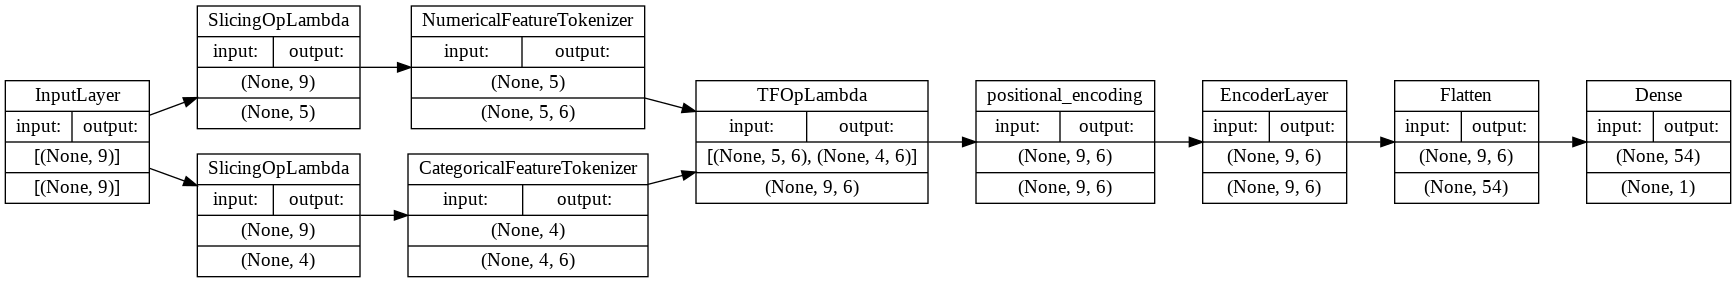

In [ ]:
d_token = 6
n_features = 5
varlen = X_train.shape[1]
cardinalities = [len(df['promo_code'].value_counts()), len(df['wkacc_code'].value_counts()), len(df['sal_code'].value_counts()), len(df['dept_code'].value_counts())]

Inputs = tf.keras.Input(shape=(X_train.shape[-1],))
n_token = NumericalFeatureTokenizer(n_features, d_token, True, 'uniform')(Inputs[:,:5])
c_token = CategoricalFeatureTokenizer(cardinalities, d_token, True, 'uniform')(Inputs[:,5:])
x = tf.concat([n_token, c_token], axis=1)
x = positional_encoding(varlen, d_token)(x)
x = EncoderLayer(d_token, 1, 12)(x)
x = tf.keras.layers.Flatten()(x)
Output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=Inputs, outputs=Output)
#print(model(X_train[:1,:]) )

# Visualize our Keras Model
tf.keras.utils.plot_model(
    model, 
    #to_file='model.png', 
    show_shapes=True, 
    show_layer_names=False, 
    rankdir='LR')

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.AUC(name='auc')]
    )

hist = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,    
    validation_data=(X_test, y_test)
    )

Epoch 1/10
176/176 [==============================] - 8s 19ms/step - loss: 0.4965 - auc: 0.7218 - val_loss: 0.4065 - val_auc: 0.8196
Epoch 2/10
176/176 [==============================] - 2s 10ms/step - loss: 0.3678 - auc: 0.8812 - val_loss: 0.2777 - val_auc: 0.9389
Epoch 3/10
176/176 [==============================] - 2s 10ms/step - loss: 0.2718 - auc: 0.9381 - val_loss: 0.2198 - val_auc: 0.9545
Epoch 4/10
176/176 [==============================] - 1s 8ms/step - loss: 0.2366 - auc: 0.9511 - val_loss: 0.1970 - val_auc: 0.9620
Epoch 5/10
176/176 [==============================] - 1s 8ms/step - loss: 0.2128 - auc: 0.9586 - val_loss: 0.1753 - val_auc: 0.9670
Epoch 6/10
176/176 [==============================] - 2s 11ms/step - loss: 0.1977 - auc: 0.9630 - val_loss: 0.1676 - val_auc: 0.9699
Epoch 7/10
176/176 [==============================] - 2s 9ms/step - loss: 0.1907 - auc: 0.9639 - val_loss: 0.1657 - val_auc: 0.9711
Epoch 8/10
176/176 [==============================] - 2s 13ms/step - los

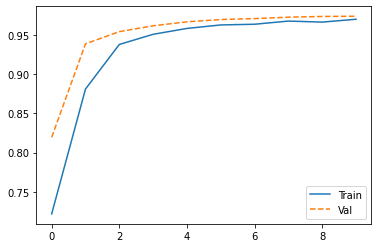

In [ ]:

plt.plot(hist.epoch, hist.history['auc'], label='Train')
plt.plot(hist.epoch, hist.history['val_auc'], linestyle="--", label='Val')
plt.legend()

In [ ]:
!pip install typing_extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
